In [55]:
import pandas as pd
import numpy as np 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv("SuperStoreOrders.csv")

In [56]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

> ### Data Understanding And Goals for Marketing Channel Analysis

### **Data Understanding**
The dataset `SuperStoreOrders.csv` contains transactional data from a global retail store. The key columns relevant for marketing channel analysis include:

1. **Customer Information**:
   - `customer_name`: Unique identifier for customers.
   - `segment`: Customer segmentation (e.g., Consumer, Corporate, Home Office).

2. **Transaction Details**:
   - `order_id`: Unique identifier for each transaction.
   - `order_date` and `ship_date`: Dates of order placement and shipment.
   - `ship_mode`: Shipping method used (e.g., Standard Class, Same Day).

3. **Geographic Data**:
   - `state`, `country`, `market`, and `region`: Location details of the customer.

4. **Product Information**:
   - `product_id`, `category`, and `sub_category`: Product details.
   - `product_name`: Specific product purchased.

5. **Financial Metrics**:
   - `sales`: Revenue generated from the transaction.
   - `quantity`: Number of units sold.
   - `discount`: Discount applied to the transaction.
   - `profit`: Profit earned from the transaction.
   - `shipping_cost`: Cost of shipping.

6. **Order Priority**:
   - `order_priority`: Priority level of the order (e.g., Critical, High, Medium).

---

### **Key Metrics for Analysis**
To perform a comprehensive marketing channel analysis, the following metrics will be derived from the dataset:

1. **Customer ID**: Use `customer_name` as a unique identifier for customers.
2. **Recency**: Calculate the number of days since the customer's last purchase using the difference between the latest transaction date (`order_date`) and the analysis date (February 17, 2025).
3. **Frequency**: Count the number of unique transactions (`order_id`) per customer.
4. **Unique Receipt/Invoice Count**: Equivalent to the count of unique `order_id`.
5. **Unique Transaction Dates**: Count distinct values in the `order_date` column per customer.
6. **Monetary Value**: Sum of all sales (`sales`) per customer.
7. **Average Total Sales per Customer**: Divide total sales by the number of transactions per customer.
8. **Average Sales per Transaction**: Divide total sales by unique receipt/invoice count.

---

### **Goals for Marketing Channel Analysis**

1. **Customer Segmentation (RFM Analysis)**:
   - Use Recency, Frequency, and Monetary metrics to segment customers into 9 groups (e.g., Champions, At Risk, Potential Loyalists).
   - Identify high-value customers and those requiring reactivation strategies.

2. **Channel Effectiveness**:
   - Analyze performance across regions (`region`, `market`) to identify high-performing geographic areas.
   - Evaluate shipping mode preferences (`ship_mode`) to optimize logistics costs and improve customer satisfaction.

3. **Product Insights**:
   - Identify top-selling categories (`category`, `sub_category`) and products (`product_name`).
   - Assess profitability by product category and region to prioritize marketing efforts.

4. **Optimization Recommendations**:
   - Suggest targeted marketing campaigns for different customer segments (e.g., loyalty programs for Champions, discounts for At Risk).
   - Recommend cost-effective shipping strategies based on customer preferences.


In [58]:
data.head(2)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011


> ### EDA (EXPLORATORY DATA ANALYSIS)
### **DATA CLEANING**

- > **Handling Duplicated Data for EDA (Exploratory Data Analysis)**

In [59]:
len(data)

51290

In [60]:
len(data.drop_duplicates()) / len(data)

1.0

Because the results are 1, there is no duplicate 

- > **CHECK DATA TYPE**

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

change   `order_date` and `ship_date` to Datetime type

In [68]:
data['order_date']=pd.to_datetime(data['order_date'].str.replace('/', '-'), dayfirst=True)

In [67]:
data['ship_date'] = pd.to_datetime(data['ship_date'].str.replace('/', '-'), dayfirst=True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  object        
 15  qu

- > **MISSING VALUE HANDLING**

- Checking Missing Value

In [ ]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [ ]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [ ]:
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()

============= order_id =================


order_id
CA-2014-100111     14
MX-2014-166541     13
TO-2014-9950       13
NI-2014-8880       13
IN-2013-42311      13
IN-2012-41261      13
MX-2013-127705     12
CA-2014-157987     12
MX-2013-142678     12
IN-2014-15263      12
IN-2011-76625      12
ES-2012-5776825    12
IN-2012-44194      11
ES-2014-4673578    11
SA-2013-7790       11
US-2013-108504     11
SF-2014-3260       11
MX-2013-134453     11
ES-2014-5605089    11
MX-2013-159100     11
IN-2013-78809      11
IN-2014-78151      11
CA-2013-165330     11
ES-2013-2700361    11
IZ-2011-770        11
EZ-2014-8460       11
US-2012-139675     11
HU-2011-1380       10
IN-2014-19274      10
SG-2013-6790       10
ES-2011-2075610    10
US-2013-162600     10
MX-2014-167493     10
ES-2014-2756281    10
MX-2014-136539     10
SU-2014-5140       10
ES-2014-3319612    10
IN-2011-27968      10
SA-2012-90         10
IR-2013-6870       10
IN-2013-17699      10
CA-2012-131338     10
MX-2011-100587     10
ES-2014-1237764    10
US-2011-102281     10
I


============= order_date =================


order_date
2014-03-09    126
2014-10-12    114
2014-12-11    103
2013-11-11    102
2014-03-12    101
2014-04-11    100
2014-04-12     96
2014-09-12     96
2014-02-12     94
2014-11-06     94
2014-06-11     92
2014-05-09     92
2014-08-05     90
2014-12-09     90
2013-07-06     89
2012-08-11     88
2014-07-11     87
2013-06-09     87
2013-06-11     87
2014-11-12     85
2014-08-09     85
2014-12-12     85
2014-10-11     84
2014-09-06     84
2014-11-09     84
2013-03-09     83
2014-08-08     82
2014-03-10     82
2014-12-08     81
2012-03-12     81
2013-06-12     80
2013-12-12     80
2013-05-09     78
2013-01-11     78
2014-05-12     78
2014-02-10     77
2014-04-09     77
2014-03-11     77
2014-05-11     76
2013-10-12     76
2011-01-11     76
2011-08-09     76
2014-07-10     75
2014-04-06     75
2014-07-08     74
2014-01-12     74
2014-07-05     73
2013-12-09     73
2013-11-06     72
2014-06-10     71
2013-11-12     71
2014-04-08     71
2013-09-09     71
2014-03-06     71
2014-10-09     71


============= ship_date =================


ship_date
2014-07-09    115
2014-07-12    101
2013-01-07     93
2014-11-11     92
2014-05-12     88
2015-02-01     87
2014-02-10     86
2013-10-11     85
2014-12-10     81
2014-03-12     80
2013-11-11     79
2013-08-06     77
2014-02-12     77
2014-08-09     76
2014-06-10     76
2013-08-09     75
2012-07-12     74
2011-03-12     74
2014-06-12     74
2013-08-12     73
2014-09-09     72
2014-10-11     71
2014-01-12     71
2014-12-08     71
2014-06-11     71
2014-09-08     70
2013-01-12     70
2014-10-08     69
2012-09-12     67
2013-12-06     67
2014-01-09     67
2013-03-09     67
2013-02-09     67
2014-11-09     66
2013-02-10     66
2014-06-09     65
2014-12-05     65
2012-05-11     65
2014-09-12     63
2014-10-12     63
2015-01-01     63
2012-03-12     63
2014-11-10     62
2014-12-09     62
2014-02-11     62
2014-05-09     61
2014-12-06     61
2014-04-10     61
2011-08-11     61
2013-07-09     61
2014-04-06     60
2013-05-06     60
2013-10-09     60
2014-08-11     60
2013-02-12     60



============= ship_mode =================


ship_mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64


============= customer_name =================


customer_name
Muhammed Yedwab           108
Steven Ward               106
Patrick O'Brill           102
Bill Eplett               102
Gary Hwang                102
Harry Greene              101
Eric Murdock              100
Art Ferguson               98
Brosina Hoffman            97
Bart Watters               96
Chloris Kastensmidt        96
Natalie Fritzler           95
John Grady                 95
Darrin Van Huff            94
Eugene Moren               94
Michael Paige              94
Tom Boeckenhauer           93
Karl Braun                 93
Paul Gonzalez              92
Noel Staavos               92
Tracy Blumstein            91
Resi Pölking               91
Joe Kamberova              91
Anna Andreadi              91
Rob Dowd                   90
Sample Company A           90
Tim Brockman               89
Aaron Bergman              89
Ralph Arnett               88
Tamara Chand               88
Kristen Hastings           88
Dianna Wilson              88
Theone Pippenger          


============= segment =================


segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64


============= state =================


state
California                              2001
England                                 1499
New York                                1128
Texas                                    985
Ile-de-France                            981
New South Wales                          781
North Rhine-Westphalia                   719
Queensland                               717
San Salvador                             615
Pennsylvania                             587
National Capital                         583
Washington                               506
Illinois                                 492
Victoria                                 491
Ohio                                     469
Distrito Federal                         469
Santo Domingo                            443
Istanbul                                 425
São Paulo                                409
Guatemala                                391
Provence-Alpes-Côte d'Azur               390
Florida                                  383
Mana


============= country =================


country
United States                       9994
Australia                           2837
France                              2827
Mexico                              2644
Germany                             2065
China                               1880
United Kingdom                      1633
Brazil                              1599
India                               1555
Indonesia                           1390
Turkey                              1378
Italy                               1108
Nigeria                              905
Spain                                859
Dominican Republic                   742
El Salvador                          736
Cuba                                 724
Honduras                             713
Philippines                          681
New Zealand                          628
Nicaragua                            614
Iran                                 607
Guatemala                            521
Egypt                                487
South Af


============= market =================


market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64


============= region =================


region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: count, dtype: int64


============= product_id =================


product_id
OFF-AR-10003651     35
OFF-AR-10003829     31
OFF-BI-10002799     30
OFF-BI-10003708     30
FUR-CH-10003354     28
OFF-BI-10002570     27
OFF-BI-10004140     25
OFF-BI-10004632     24
OFF-BI-10001808     24
OFF-BI-10004195     24
OFF-BI-10003650     24
OFF-BIN-10002061    23
OFF-AR-10000091     23
OFF-BI-10000542     23
OFF-STA-10001791    22
OFF-AR-10004825     22
OFF-AR-10000110     22
OFF-BI-10004654     22
OFF-BI-10001249     22
OFF-STA-10001747    21
OFF-AR-10000594     20
OFF-FEL-10001865    20
OFF-AR-10004519     20
OFF-AR-10002805     20
FUR-CH-10002647     20
OFF-CAR-10001577    20
OFF-BI-10000179     20
OFF-AR-10001777     20
OFF-AR-10001228     20
OFF-AR-10000799     20
OFF-AR-10001529     20
OFF-AR-10001418     20
OFF-ST-10004377     19
OFF-IBI-10003191    19
OFF-STA-10004885    19
OFF-SAN-10004881    19
OFF-SU-10001731     19
OFF-BI-10000341     19
OFF-AR-10000833     19
OFF-ST-10000624     19
OFF-PA-10001970     19
OFF-ST-10000078     19
OFF-BI-10001507     19



============= category =================


category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64


============= sub_category =================


sub_category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64


============= product_name =================


product_name
Staples                                                                                                                            227
Cardinal Index Tab, Clear                                                                                                           92
Eldon File Cart, Single Width                                                                                                       90
Rogers File Cart, Single Width                                                                                                      84
Ibico Index Tab, Clear                                                                                                              83
Sanford Pencil Sharpener, Water Color                                                                                               80
Smead File Cart, Single Width                                                                                                       77
Acco Index Tab, Clear                     


============= sales =================


sales
13        589
11        550
14        527
19        523
17        520
15        518
12        512
16        505
9         498
22        478
10        477
27        467
18        459
6         433
30        430
21        430
20        427
25        425
23        421
26        420
24        416
8         413
7         411
32        395
28        379
5         372
29        369
44        361
31        358
40        357
49        346
50        344
45        337
48        336
34        334
41        315
33        310
4         306
38        295
35        292
53        291
39        286
36        285
52        281
42        277
3         274
54        269
46        268
43        267
47        265
51        263
60        255
37        245
57        240
55        238
58        238
59        237
56        227
61        216
62        215
98        202
80        192
88        187
64        185
65        184
68        180
63        180
67        180
85        174
100       173
66        173



============= quantity =================


quantity
2     12748
3      9682
1      8963
4      6385
5      4882
6      3020
7      2385
8      1361
9       987
10      276
14      186
12      176
11      156
13       83
Name: count, dtype: int64


============= discount =================


discount
0.000    29009
0.200     4998
0.100     4068
0.400     3177
0.600     2006
0.700     1786
0.500     1633
0.170      735
0.470      725
0.150      541
0.002      461
0.270      388
0.300      340
0.450      327
0.800      316
0.250      198
0.070      150
0.350      122
0.402      104
0.370       74
0.202       41
0.320       27
0.602       23
0.650       17
0.570       12
0.550       10
0.850        2
Name: count, dtype: int64


============= profit =================


profit
 0.00000       668
 4.32000        70
 3.96000        69
 7.92000        67
 2.64000        63
 2.88000        60
 6.84000        57
 9.00000        56
 0.48000        55
 3.42000        55
 5.28000        54
 3.60000        53
 1.26000        53
 8.64000        52
 4.20000        51
 5.04000        51
 5.40000        51
 5.94000        51
 10.80000       50
 4.92000        50
 2.52000        50
 2.97000        49
 6.60000        49
 5.70000        49
 6.00000        49
 2.16000        48
 3.30000        48
 7.56000        48
 12.60000       48
 6.72000        47
 1.80000        47
 1.98000        47
 6.12000        47
 4.50000        46
 3.78000        46
 8.28000        46
 1.44000        46
 11.88000       46
 7.44000        45
 0.84000        44
 13.68000       44
 6.22080        43
 2.82000        43
 15.84000       43
 3.18000        43
 0.96000        42
 12.96000       42
 5.76000        42
 2.10000        41
 4.08000        41
 3.24000        41
 4.80000        41
 0.24


============= shipping_cost =================


shipping_cost
0.86      76
1.26      75
0.71      75
1.36      74
0.35      73
0.79      71
0.94      71
1.04      71
0.97      70
0.69      70
1.30      70
1.20      69
0.64      68
0.62      68
0.88      68
0.85      68
0.56      68
0.96      68
1.75      67
0.77      67
1.55      65
0.76      65
0.70      65
1.11      65
0.98      64
1.00      64
0.89      64
0.95      63
1.05      63
1.14      63
0.74      63
1.13      62
0.93      62
1.58      62
0.67      62
1.54      62
2.01      61
1.07      61
0.80      61
1.49      61
1.41      61
1.44      61
1.97      61
2.09      60
0.90      60
1.08      60
1.80      60
0.72      60
1.19      59
0.52      59
1.17      59
0.40      59
2.16      59
1.15      59
0.55      59
0.99      59
1.62      58
0.36      58
0.84      58
2.45      58
0.42      58
0.82      58
1.29      57
0.57      57
0.48      57
0.38      57
1.21      56
1.33      56
1.16      56
1.23      56
0.33      56
1.79      56
1.68      56
0.66      56
0.50      56
1.32      5


============= order_priority =================


order_priority
Medium      29433
High        15501
Critical     3932
Low          2424
Name: count, dtype: int64


============= year =================


year
2014    17531
2013    13799
2012    10962
2011     8998
Name: count, dtype: int64

In [72]:
data.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

- From the results above, there is no missing value in the dataset

In [ ]:
data

> change the dataset to excel

In [ ]:
# data.to_excel("superstore.xlsx")
data.to_csv("superstore.csv")

In [71]:
data.to_excel("superstore.xlsx")

In [ ]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom 'order_date' diubah menjadi format datetime
data['order_date'] = pd.to_datetime(data['order_date'])

# Menambahkan kolom 'year' berdasarkan tahun dari 'order_date'
data['year'] = data['order_date'].dt.year

# Mengelompokkan data berdasarkan tahun dan menghitung jumlah entri untuk kolom 'sub_category'
df_yearly = data.groupby('year', as_index=False)['sub_category'].count()

# Membuat plot area menggunakan Seaborn dan Matplotlib
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')

# Plot garis dengan marker
sns.lineplot(data=df_yearly, x='year', y='sub_category', marker='o', color='cyan')

# Mengisi area di bawah garis
plt.fill_between(df_yearly['year'], df_yearly['sub_category'], color='blue', alpha=0.1)

# Atur background grafik
plt.gca().set_facecolor('darkgrey')

# Menambahkan label dan judul grafik
plt.xlabel('Year')
plt.ylabel('Total Sub Categories')
plt.title('Year by Year Songs Collection', fontsize=16, fontweight='bold')

# Menambahkan grid untuk grafik
plt.grid(True)

# Menampilkan grafik
plt.show()


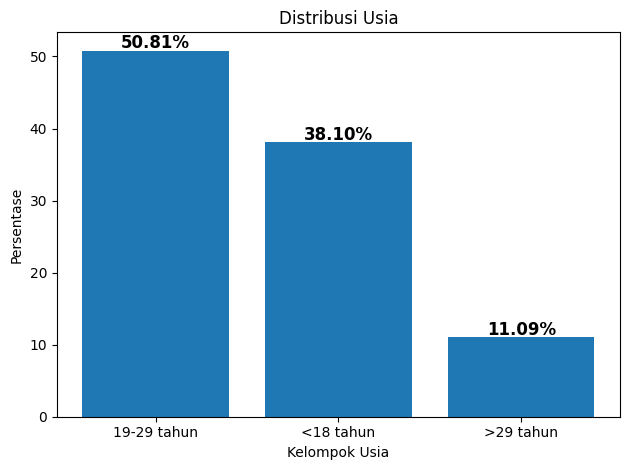

In [12]:
import matplotlib.pyplot as plt

# Data
labels = ['19-29 tahun', '<18 tahun', '>29 tahun']
values = [50.81, 38.10, 11.09]

# Membuat plot
plt.bar(labels, values)

# Menambahkan judul dan label
plt.title('Distribusi Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Persentase')

# Menambahkan nilai di atas bar dengan jarak lebih kecil
for i, value in enumerate(values):
    plt.text(i, value + 0.3, f'{value:.2f}%', ha='center', fontsize=12, fontweight='bold')

# Menampilkan plot
plt.tight_layout()
plt.show()
